# פרויקט בלמידת מכונה:
MVP-חיזוי הזוכה בתואר ה
(Most Valuable Player)

## שלב ראשון - שליפת נתונים מהאתר

### יצירת נתונים לכל השחקנים שזכו בתואר

we now create a dataset for all of the MVPs so we will have what to compare the regular player stats to find the MVP

In [ ]:
!pip install requests

In [ ]:
#range of years we want to extract Data from
years = list(range(1991,2021))

In [ ]:
#defining the URL we want to scrape
StartingURL = "https://www.basketball-reference.com/awards/awards_{}.html"

In [ ]:
import requests
import time

In [ ]:

#going over each year from the list with a loop and taking the data form the site:
for year in years:
  URL = StartingURL.format(year)
  data = requests.get(URL)
  #Creating a file with the HTML mvp data for each year between 1991-2022
  with open("/content/drive/MyDrive/Machine Learning/MVP/{}.html".format(year), "w+") as f:
    f.write(data.text)

In [ ]:
for year in range(1991,2023):
  FinalData = GetImage(year)
  with open("/content/drive/MyDrive/Machine Learning/MVP/{}.html".format(year), "w+") as f:
    f.write(FinalData)

In [ ]:
def GetImage(year):
  try:
    URL = StartingURL.format(year)
    print(f"URL is {URL}")
    data = requests.get(URL)
    #Creating a file with the HTML mvp data for each year between 1991-2022
    return data.text
  except:
    time.sleep(10)
    return GetImage(year)

starting the scraping using BeautifulSoup

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
import pandas as pd

deleting the stuff we dont want from the html using

```
.decompose()
```
function and extracting the table.

In [ ]:
dfs = []
for year in years:
  with open("/content/drive/MyDrive/Machine Learning/MVP/{}.html".format(year)) as f:
    page = f.read()
  soup = BeautifulSoup(page, "html.parser")
  soup.find('tr',class_="over_header").decompose()
  mvp_table = soup.find(id="mvp")
  print(mvp_table)
  mvp = pd.read_html(str(mvp_table))[0]
  mvp["Year"] = year

  dfs.append(mvp)

In [ ]:
dfs

In [ ]:
mvps = pd.concat(dfs)

In [ ]:
mvps.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


In [ ]:
mvps.to_csv("mvps.csv")

### יצירת נתונים של כל השחקנים

עכשיו נמצא את הסטטיסטיקות של השחקנים שלא זכו בתואר כדי שנוכל להשוות ולחזות בעזרתם מי כן יזכה

משתמשים בסלניום כדי לעשות סקרייפ לאתר שבנוי בג'אבה סקריפט,
כיוון שכמעט בלתי אפשרי לעבוד עם סלניום בגוגל קולאב,

ביצעתי את הסקרייפינג דרך
jupyter notebook


הקוד מצורף כאן:




```
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import  time

```


```
driver = webdriver.Firefox()
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_advanced.html"

years = list(range(1991, 2021))
for year in years:
    url = player_stats_url.format(year)
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    html = driver.page_source
    with open("Downloads/Advanced{}.html".format(year), "w+",encoding="utf-8") as f:
        f.write(html)
```


```
df = []
years = list(range(1991, 2021))
for year in years:
    with open("Downloads/Advanced{}.html".format(year),encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find(id="advanced_stats")
    player = pd.read_html(str(player_table))[0]
    player["Year"] = year
    df.append(player)
players = pd.concat(df)
players.to_csv("Downloads/AdvancedplayerData.csv")
```









### יצירת נתונים של הקבוצות והאם היו בקבוצות

In [ ]:
import pandas as pd
import requests
StartingURL1="https://www.basketball-reference.com/leagues/NBA_{}_standings.html"
years = list(range(1991,2021))

for year in years:
  URL1 = StartingURL1.format(year)
  data1 = requests.get(URL1)

  with open("/content/drive/MyDrive/Machine Learning/Teams/{}.html".format(year), "w+") as Tm:
    Tm.write(data1.text)

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
dfs_E = []
for year in years:
  with open("/content/drive/MyDrive/Machine Learning/Teams/{}.html".format(year)) as Tm:
    page = Tm.read()
  soup = BeautifulSoup(page, "html.parser")
  E_Table = soup.find(id="divs_standings_E")
  print(E_Table)
  E_Tms = pd.read_html(str(E_Table))[0]
  E_Tms["Year"] = year

  dfs_E.append(E_Tms)


In [ ]:
E_Teams = pd.concat(dfs_E)

In [ ]:
E_Teams.to_csv("/content/drive/MyDrive/Machine Learning/Teams/Eastern Conference/EasternConferenceStandings.csv")

In [ ]:
dfs_W = []
for year in years:
  with open("/content/drive/MyDrive/Machine Learning/Teams/{}.html".format(year)) as Tm:
    page = Tm.read()
  soup = BeautifulSoup(page, "html.parser")
  W_table = soup.find(id="divs_standings_W")
  W_Tms = pd.read_html(str(W_table))[0]
  W_Tms["Year"] = year

  dfs_W.append(W_Tms)

In [ ]:
W_Teams = pd.concat(dfs_W)

In [ ]:
W_Teams.to_csv("/content/drive/MyDrive/Machine Learning/Teams/Western Conference/WesternConferenceStandings.csv")

## ניקוי  הנתונים


### ניקוי הנתונים של הקבוצות

In [ ]:
import pandas as pd

In [ ]:
western = pd.read_csv("/content/drive/MyDrive/Machine Learning/Teams/Western Conference/WesternConferenceStandings.csv")
western['Tm']=western['Western Conference']
western.drop('Western Conference', axis=1, inplace = True)

eastern = pd.read_csv("/content/drive/MyDrive/Machine Learning/Teams/Eastern Conference/EasternConferenceStandings.csv")
eastern['Tm']=eastern['Eastern Conference']
eastern.drop('Eastern Conference', axis = 1, inplace = True)

teams = pd.concat([western,eastern])
teams=teams[~teams['W'].str.contains("Division")]
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Tm
1,1,55,27,.671,—,107.1,102.6,4.30,1991,San Antonio Spurs*
2,2,54,28,.659,1.0,104.0,100.7,3.18,1991,Utah Jazz*
3,3,52,30,.634,3.0,106.7,103.2,3.27,1991,Houston Rockets*
4,4,31,51,.378,24.0,105.9,109.9,-3.79,1991,Orlando Magic
5,5,29,53,.354,26.0,99.6,103.5,-3.75,1991,Minnesota Timberwolves
...,...,...,...,...,...,...,...,...,...,...
515,13,44,29,.603,—,112.0,109.1,2.59,2020,Miami Heat*
516,14,33,40,.452,11.0,107.3,108.3,-0.93,2020,Orlando Magic*
517,15,23,42,.354,17.0,102.9,109.6,-7.03,2020,Charlotte Hornets
518,16,25,47,.347,18.5,114.4,119.1,-5.24,2020,Washington Wizards


In [ ]:
teams=teams[['Tm','Year','W/L%']]

In [ ]:
teams['Tm'] = teams['Tm'].str.replace("*","")
teams['Tm'] = teams['Tm'].str.replace("Boston Celtics","BOS")
teams['Tm'] = teams['Tm'].str.replace("Atlanta Hawks","ATL")
teams['Tm'] = teams['Tm'].str.replace("Brooklyn Nets","BKN")
teams['Tm'] = teams['Tm'].str.replace("New Jersey Nets","NJN")
teams['Tm'] = teams['Tm'].str.replace("Charlotte Hornets","CHA")
teams['Tm'] = teams['Tm'].str.replace("Charlotte Bobcats","CHB")
teams['Tm'] = teams['Tm'].str.replace("Chicago Bulls","CHI")
teams['Tm'] = teams['Tm'].str.replace("Cleveland Cavaliers","CLE")
teams['Tm'] = teams['Tm'].str.replace("Dallas Mavericks","DAL")
teams['Tm'] = teams['Tm'].str.replace("Denver Nuggets","DEN")
teams['Tm'] = teams['Tm'].str.replace("Golden State Warriors","GSW")
teams['Tm'] = teams['Tm'].str.replace("Houston Rockets","HOU")
teams['Tm'] = teams['Tm'].str.replace("Detroit Pistons","DET")
teams['Tm'] = teams['Tm'].str.replace("Indiana Pacers","IND")
teams['Tm'] = teams['Tm'].str.replace("Los Angeles Clippers","LAC")
teams['Tm'] = teams['Tm'].str.replace("Los Angeles Lakers","LAL")
teams['Tm'] = teams['Tm'].str.replace("Memphis Grizzlies","MEM")
teams['Tm'] = teams['Tm'].str.replace("Vancouver Grizzlies","MEM")
teams['Tm'] = teams['Tm'].str.replace("Miami Heat","MIA")
teams['Tm'] = teams['Tm'].str.replace("Milwaukee Bucks","MIL")
teams['Tm'] = teams['Tm'].str.replace("Minnesota Timberwolves","MIN")
teams['Tm'] = teams['Tm'].str.replace("New Orleans Pelicans","NOP")
teams['Tm'] = teams['Tm'].str.replace("New Orleans Hornets","NOH")
teams['Tm'] = teams['Tm'].str.replace("New York Knicks","NYK")
teams['Tm'] = teams['Tm'].str.replace("Oklahoma City Thunder","OKC")
teams['Tm'] = teams['Tm'].str.replace("Seattle SuperSonics","SEA")
teams['Tm'] = teams['Tm'].str.replace("Orlando Magic","ORL")
teams['Tm'] = teams['Tm'].str.replace("Philadelphia 76ers","PHI")
teams['Tm'] = teams['Tm'].str.replace("Phoenix Suns","PHO")
teams['Tm'] = teams['Tm'].str.replace("Portland Trail Blazers","POR")
teams['Tm'] = teams['Tm'].str.replace("Sacramento Kings","SAC")
teams['Tm'] = teams['Tm'].str.replace("San Antonio Spurs","SAS")
teams['Tm'] = teams['Tm'].str.replace("Toronto Raptors","TOR")
teams['Tm'] = teams['Tm'].str.replace("Utah Jazz","UTA")
teams['Tm'] = teams['Tm'].str.replace("Washington Wizards","WAS")
teams['Tm'] = teams['Tm'].str.replace("Washington Bullets","WSB")

teams = teams.sort_values('Year',ascending=True)
teams

<ipython-input-12-6ccf74ec0d1a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  teams['Tm'] = teams['Tm'].str.replace("*","")


,Tm,Year,W/L%
8,CHI,1991,.744
5,MIN,1991,.354
12,IND,1991,.500
14,CHA,1991,.317
13,CLE,1991,.402
...,...,...,...
516,ORL,2020,.452
492,OKC,2020,.611
497,LAL,2020,.732
512,DET,2020,.303


### ניקוי הנתונים של השחקנים


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
players_advanced = pd.read_csv("/content/drive/MyDrive/Machine Learning/players/All Players Data/AdvancedplayerData.csv")
players_stats = pd.read_csv("/content/drive/MyDrive/Machine Learning/players/All Players Data/playersData.csv")

In [ ]:
players_stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [ ]:
players_advanced.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Year'],
      dtype='object')

In [ ]:
players_stats.drop('Unnamed: 0',axis = 1, inplace = True)
players_advanced.drop('Unnamed: 0',axis = 1, inplace = True)
players_advanced.drop('Unnamed: 19',axis = 1, inplace = True)
players_advanced.drop('Unnamed: 24',axis = 1, inplace = True)

In [ ]:
players_stats.drop('Rk',axis = 1,inplace = True)
players_advanced.drop('Rk',axis = 1,inplace = True)


In [ ]:
print(players_stats.shape)
print(players_advanced.shape)

(16681, 30)
(16681, 27)


In [ ]:
players_stats

In [ ]:
for i in range(1,17314):
  if players_stats.iloc[i, players_stats.columns.get_loc('Age')] == 'Age':
    players_stats.drop(players_stats.index[i],inplace = True)
players_stats

In [ ]:
for i in range(1,17314):
  if players_advanced.iloc[i, players_advanced.columns.get_loc('Age')] == 'Age':
    players_advanced.drop(players_advanced.index[i],inplace = True)
players_stats

In [ ]:
players_stats.loc[16060:16100]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
16060,Torrey Craig,SF,28,DEN,75,37,20.0,2.1,4.8,.442,...,1.2,2.3,3.5,1.0,0.5,0.6,0.6,2.3,5.7,2019
16061,Jamal Crawford,SG,38,PHO,64,0,18.9,2.7,6.8,.397,...,0.1,1.2,1.3,3.6,0.5,0.2,1.5,1.2,7.9,2019
16062,Mitch Creek,SF,26,TOT,5,0,9.6,1.6,3.2,.500,...,1.2,1.2,2.4,1.2,0.4,0.0,0.2,0.6,4.2,2019
16063,Mitch Creek,SF,26,BRK,4,0,9.0,1.3,2.5,.500,...,1.3,1.3,2.5,1.3,0.3,0.0,0.0,0.8,3.8,2019
16064,Mitch Creek,SF,26,MIN,1,0,12.0,3.0,6.0,.500,...,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,6.0,2019
16066,Jae Crowder,SF,28,UTA,80,11,27.1,4.0,10.0,.399,...,0.8,4.1,4.8,1.7,0.8,0.4,1.1,2.1,11.9,2019
16067,Dante Cunningham,PF,31,SAS,64,21,14.5,1.2,2.5,.475,...,0.8,2.2,2.9,0.8,0.4,0.2,0.3,1.1,3.0,2019
16068,Seth Curry,SG,28,POR,74,2,18.9,2.9,6.3,.456,...,0.4,1.3,1.6,0.9,0.5,0.2,0.8,1.3,7.9,2019
16069,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,.472,...,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3,2019
16070,Troy Daniels,SG,27,PHO,51,1,14.9,2.2,5.4,.411,...,0.3,1.2,1.4,0.5,0.5,0.1,0.5,1.5,6.2,2019


In [ ]:
players_stats['Player'] = players_stats['Player'].str.replace("*","")
players_advanced['Player'] = players_advanced['Player'].str.replace("*","")


In [ ]:
CleanedPlayerStats=players_stats.merge(players_advanced, how="outer",on=["Player", "Tm",'Year'])

In [ ]:
CleanedPlayerStats.columns

Index(['Player', 'Pos_x', 'Age_x', 'Tm', 'G_x', 'GS', 'MP_x', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Year', 'Pos_y', 'Age_y', 'G_y', 'MP_y', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [ ]:
CleanedPlayerStats.drop('Pos_y',axis=1,inplace=True)
CleanedPlayerStats.drop('Age_y',axis=1,inplace=True)
CleanedPlayerStats.drop('G_y',axis=1,inplace=True)
CleanedPlayerStats.drop('MP_y',axis=1,inplace=True)


In [ ]:
def single_row(df):
  if df.shape[0]==1:
    return df
  else:
    row = df[df["Tm"] == "TOT"]
    row["Tm"] = df.iloc[-1,:]["Tm"]
    return row
CleanedPlayerStats = CleanedPlayerStats.groupby(["Player","Year"]).apply(single_row)

In [ ]:
CleanedPlayerStats.index = CleanedPlayerStats.index.droplevel()

In [ ]:
CleanedPlayerStats

In [ ]:
from google.colab import files

In [ ]:
CleanedPlayerStats.to_csv("CleanedPlayerStats.csv")

In [ ]:
files.download("CleanedPlayerStats.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


מחברים את הנתונים של הזוכים בתואר והשחקנים הרגילים

### ניקוי הנתונים של הזוכים בתואר וחיבור כל הנתונים לטבלה אחת


In [ ]:
import pandas as pd

In [ ]:
mvp_stats = pd.read_csv("/content/drive/MyDrive/Machine Learning/MVP/MVP dataset/mvps.csv")
mvp_stats.columns

Index(['Unnamed: 0', 'Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won',
       'Pts Max', 'Share', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%',
       '3P%', 'FT%', 'WS', 'WS/48', 'Year'],
      dtype='object')

In [ ]:
mvp_stats = mvp_stats[['Player','Year','Pts Won','Pts Max', 'Share']]
mvp_stats

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891.0,960,0.928
1,Magic Johnson,1991,497.0,960,0.518
2,David Robinson,1991,476.0,960,0.496
3,Charles Barkley,1991,222.0,960,0.231
4,Karl Malone,1991,142.0,960,0.148
...,...,...,...,...,...
454,Damian Lillard,2020,23.0,1010,0.023
455,Nikola Jokić,2020,18.0,1010,0.018
456,Pascal Siakam,2020,17.0,1010,0.017
457,Jimmy Butler,2020,9.0,1010,0.009


In [ ]:
players = pd.read_csv("/content/drive/MyDrive/Machine Learning/players/All Players Data/CleanedPlayerStats.csv")

In [ ]:
AllStats =players.merge(mvp_stats,how="outer",on=['Player','Year'])

In [ ]:
AllStats.drop('Unnamed: 0',axis= 1,inplace= True)

In [ ]:
AllStats.head(50)

,Player,Pos_x,Age_x,Tm,G_x,GS,MP_x,FG,FGA,FG%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Pts Won,Pts Max,Share
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,2.9,6.1,0.135,0.1,-0.2,0.0,1.1,NaN,NaN,NaN
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,0.476,...,2.9,8.8,0.145,1.7,-1.0,0.7,2.0,NaN,NaN,NaN
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,0.537,...,2.6,8.6,0.147,1.6,-0.9,0.7,1.9,NaN,NaN,NaN
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,2.6,9.3,0.157,1.8,-1.2,0.6,1.8,NaN,NaN,NaN
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,0.504,...,2.1,6.7,0.120,0.8,-0.9,-0.1,1.3,NaN,NaN,NaN
5,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,0.484,...,1.7,4.4,0.100,-0.4,-0.9,-1.3,0.4,NaN,NaN,NaN
6,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,0.483,...,2.4,4.8,0.093,-1.0,-0.4,-1.4,0.4,NaN,NaN,NaN
7,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,0.453,...,2.4,5.2,0.095,-1.1,-0.3,-1.4,0.4,NaN,NaN,NaN
8,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,0.422,...,0.7,1.4,0.074,-1.1,-1.1,-2.2,0.0,NaN,NaN,NaN
9,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,0.447,...,3.3,5.0,0.124,-1.1,0.8,-0.3,0.8,NaN,NaN,NaN


In [ ]:
AllStats[["Pts Won", "Pts Max", "Share"]] = AllStats[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [ ]:
AllStats

,Player,Pos_x,Age_x,Tm,G_x,GS,MP_x,FG,FGA,FG%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Pts Won,Pts Max,Share
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,2.9,6.1,0.135,0.1,-0.2,0.0,1.1,0.0,0.0,0.0
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,0.476,...,2.9,8.8,0.145,1.7,-1.0,0.7,2.0,0.0,0.0,0.0
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,0.537,...,2.6,8.6,0.147,1.6,-0.9,0.7,1.9,0.0,0.0,0.0
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,2.6,9.3,0.157,1.8,-1.2,0.6,1.8,0.0,0.0,0.0
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,0.504,...,2.1,6.7,0.120,0.8,-0.9,-0.1,1.3,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13547,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,0.505,...,1.9,3.3,0.134,-2.9,0.6,-2.3,-0.1,0.0,0.0,0.0
13548,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,0.552,...,0.7,1.3,0.133,-2.8,0.2,-2.6,-0.1,0.0,0.0,0.0
13549,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,0.442,...,0.4,0.5,0.097,-4.5,0.6,-3.9,-0.1,0.0,0.0,0.0
13550,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,0.568,...,0.9,2.4,0.122,-1.7,0.4,-1.3,0.2,0.0,0.0,0.0


In [ ]:
pd.isnull(AllStats).sum()

Player        0
Pos_x         0
Age_x         0
Tm            0
G_x           0
GS            0
MP_x          0
FG            0
FGA           0
FG%          49
3P            0
3PA           0
3P%        2023
2P            0
2PA           0
2P%          79
eFG%         49
FT            0
FTA           0
FT%         444
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
PER           3
TS%          44
3PAr         49
FTr          49
ORB%          3
DRB%          3
TRB%          3
AST%          3
STL%          3
BLK%          3
TOV%         36
USG%          3
OWS           0
DWS           0
WS            0
WS/48         3
OBPM          0
DBPM          0
BPM           0
VORP          0
Pts Won       0
Pts Max       0
Share         0
dtype: int64

In [ ]:
AllStats = AllStats.fillna(0)

In [ ]:
AllStats.columns

Index(['Player', 'Pos_x', 'Age_x', 'Tm', 'G_x', 'GS', 'MP_x', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Year', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'Pts Won', 'Pts Max', 'Share'],
      dtype='object')

## EDA - ניתוח הנתונים

### ניתוח בעזרת טבלאות

מגרף זה אנו לומדים אילו מאפיינים משפיעים אחד על השני. ניתן לראות שהמאפיין המשפיע ביותר על כמות ההצבעות לזכייה בתואר הוא המאפיין VORP.


In [ ]:
AllStats[['Pts Won', 'Pts Max', 'Share', 'Age_x', 'G_x', 'GS', 'MP_x', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Year', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP']].describe()

,Pts Won,Pts Max,Share,Age_x,G_x,GS,MP_x,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,...,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000
mean,6.665289,39.220779,0.005755,26.798259,52.990186,25.849985,20.402051,3.089396,6.874491,0.436591,...,14.227457,18.826653,1.374336,1.275280,2.650539,0.073257,-1.479169,-0.187389,-1.666706,0.633043
std,68.308136,210.460517,0.058695,4.240905,25.181352,29.258431,10.146368,2.198027,4.630754,0.095535,...,6.236844,5.464629,2.085862,1.231511,3.018870,0.100737,4.073354,1.822019,5.070795,1.372268
min,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-3.300000,-1.000000,-2.100000,-2.519000,-68.900000,-31.100000,-92.100000,-2.600000
25%,0.000000,0.000000,0.000000,23.000000,33.000000,1.000000,12.000000,1.375000,3.200000,0.400000,...,10.900000,15.300000,0.000000,0.300000,0.300000,0.038000,-3.200000,-1.000000,-3.500000,-0.100000
50%,0.000000,0.000000,0.000000,26.000000,60.000000,11.000000,19.800000,2.500000,5.700000,0.440000,...,13.500000,18.500000,0.600000,0.900000,1.700000,0.081000,-1.300000,-0.200000,-1.400000,0.100000
75%,0.000000,0.000000,0.000000,30.000000,75.000000,51.000000,28.800000,4.400000,9.600000,0.482000,...,16.700000,22.000000,2.200000,1.900000,4.100000,0.120000,0.400000,0.700000,0.500000,1.000000
max,1310.000000,1310.000000,1.000000,44.000000,85.000000,83.000000,43.700000,12.700000,27.800000,1.000000,...,100.000000,100.000000,14.900000,9.100000,20.400000,2.712000,199.400000,60.700000,242.200000,11.800000


In [ ]:
Position = AllStats.groupby("Pos_x").mean(numeric_only=True)
Position

,Age_x,G_x,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Pts Won,Pts Max,Share
Pos_x,,,,,,,,,,,,,,,,,,,,,
C,27.190614,51.274368,26.202527,18.100505,2.680036,5.399639,0.478318,0.074874,0.238159,0.089794,...,1.454838,2.674585,0.086574,-2.458700,8.137184e-02,-2.377653,0.445415,5.559567,36.046931,0.004968
C-PF,27.240000,48.080000,15.960000,15.784000,1.992000,4.204000,0.467000,0.072000,0.236000,0.067320,...,1.120000,1.724000,0.082640,-2.808000,2.120000e-01,-2.600000,0.136000,0.000000,0.000000,0.000000
PF,26.791071,52.966786,24.554286,19.840571,3.071679,6.570250,0.453369,0.305536,0.904500,0.180679,...,1.449643,2.842643,0.082979,-1.616536,-2.477857e-01,-1.866250,0.580464,8.421071,42.025000,0.007230
PF-C,28.538462,44.615385,13.153846,17.230769,2.230769,4.880769,0.453192,0.326923,0.965385,0.154308,...,1.011538,1.338462,0.058846,-2.819231,1.538462e-01,-2.661538,0.123077,0.000000,0.000000,0.000000
PF-SF,26.040000,51.680000,20.880000,19.380000,2.536000,5.904000,0.433040,0.616000,1.720000,0.256320,...,0.924000,1.516000,0.049880,-2.224000,-5.960000e-01,-2.816000,0.024000,0.000000,0.000000,0.000000
PG,26.798624,54.058082,26.522354,21.398815,3.121819,7.320329,0.410580,0.724876,2.088116,0.304569,...,1.117042,2.666335,0.067311,-0.848223,-2.240352e-01,-1.072335,0.821131,7.166221,51.929690,0.006112
PG-SF,31.000000,66.000000,64.000000,37.800000,5.800000,14.400000,0.402000,1.000000,3.100000,0.342000,...,2.200000,1.500000,0.029000,-1.400000,-1.200000e+00,-2.600000,-0.400000,0.000000,0.000000,0.000000
PG-SG,27.000000,48.535714,18.428571,20.467857,2.942857,7.200000,0.385393,0.735714,2.103571,0.302286,...,0.732143,1.460714,0.046571,-1.442857,-5.321429e-01,-1.971429,0.300000,0.000000,0.000000,0.000000
SF,26.633306,54.251216,27.311183,21.603687,3.288776,7.448096,0.425915,0.675810,1.931118,0.288090,...,1.279417,2.656686,0.069361,-1.166815,-1.816856e-01,-1.346272,0.698906,6.073744,34.076175,0.005112


ניתן ללמוד מטבלה זו שהעמדה ממנה הכי הרבה שחקנים זוכים ב
MVP היא SF

In [ ]:
Age = AllStats.groupby("Age_x").mean(numeric_only=True)
Age.sort_values("Share", ascending=False).head(15)

,G_x,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,2P,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Pts Won,Pts Max,Share
Age_x,,,,,,,,,,,,,,,,,,,,,
28,56.861082,31.793213,22.871050,3.556522,7.837010,0.444537,0.632450,1.777731,0.248855,2.924390,...,1.487911,3.367232,0.087266,-0.841782,-0.091729,-0.934783,0.914740,12.406151,52.343584,0.011063
29,56.730140,30.885514,22.866822,3.474883,7.711215,0.440109,0.645327,1.802336,0.250322,2.828037,...,1.525701,3.256308,0.082410,-1.038668,-0.106893,-1.145794,0.869860,10.536215,54.299065,0.009419
27,55.786453,30.089370,22.142521,3.459360,7.623142,0.442278,0.584102,1.660113,0.235758,2.876199,...,1.430386,3.175541,0.079215,-1.160207,-0.156162,-1.316275,0.830292,10.903104,47.742239,0.009279
31,55.706745,27.133431,21.667302,3.150880,7.065543,0.433328,0.591202,1.670821,0.244705,2.559238,...,1.416716,2.917302,0.078716,-1.336950,-0.050293,-1.388123,0.706012,8.369501,47.272727,0.007336
32,53.386364,26.127622,20.782867,2.968706,6.648427,0.434295,0.556643,1.549126,0.241540,2.412063,...,1.335839,2.821853,0.079404,-1.427797,-0.059266,-1.490210,0.675350,8.134615,41.765734,0.006881
25,53.246954,25.922827,20.676929,3.237287,7.150609,0.441513,0.530301,1.507799,0.233154,2.706011,...,1.286596,2.792120,0.078864,-1.196913,-0.212673,-1.410073,0.704143,7.983753,42.932575,0.006761
33,51.244009,25.226580,20.523747,2.843137,6.375163,0.426355,0.537255,1.527233,0.221752,2.307190,...,1.339216,2.712854,0.076610,-1.629847,0.073203,-1.554902,0.650109,7.525054,45.119826,0.006721
30,56.579949,29.927665,22.166624,3.309772,7.369289,0.440994,0.608122,1.704695,0.241168,2.700635,...,1.477792,3.141244,0.083549,-1.095051,-0.080584,-1.176396,0.797970,7.248731,59.911168,0.006327
35,51.131474,24.434263,19.878088,2.625100,5.928685,0.429801,0.489243,1.370120,0.242438,2.136255,...,1.269721,2.529084,0.083606,-1.544622,0.246614,-1.305179,0.595219,6.597610,41.872510,0.006012


מטבלה זו ניתן ללמוד שהגיל שבו זוכים הכי הרבה שחקנים בתואר הוא 28

### ניתוח בעזרת גרפים

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-38-dcb346f9d44b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_x', y='Share', data=AllStats,palette='tab10');


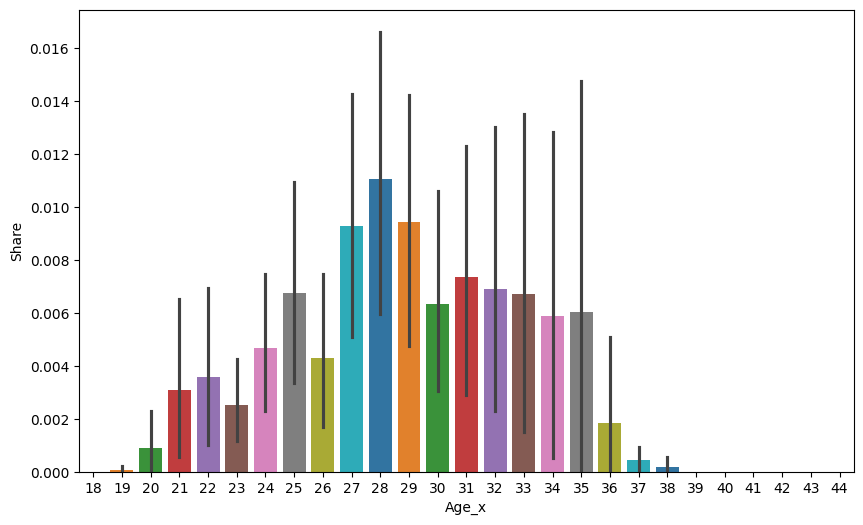

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='Age_x', y='Share', data=AllStats,palette='tab10');

מכאן אנו לומדים מה שלמדנו בטבלה שהגיל בו הכי הרבה זוכים בתואר הוא 28

<Axes: xlabel='VORP', ylabel='Share'>

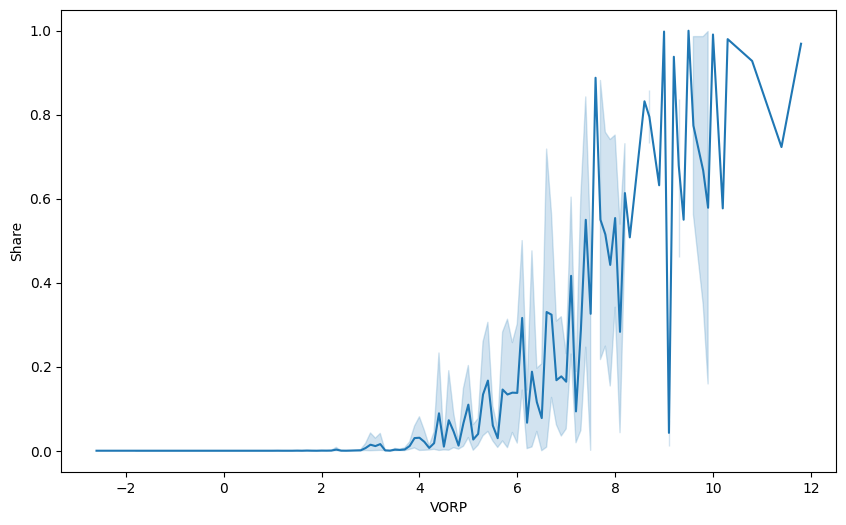

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(data=AllStats, x='VORP',y='Share')

ניתן לראות בבירור את המגמת עלייה שמצביעה על זה שלמאפיין יש הרבה השפעה על הזוכה בתואר

<Axes: xlabel='GS', ylabel='Share'>

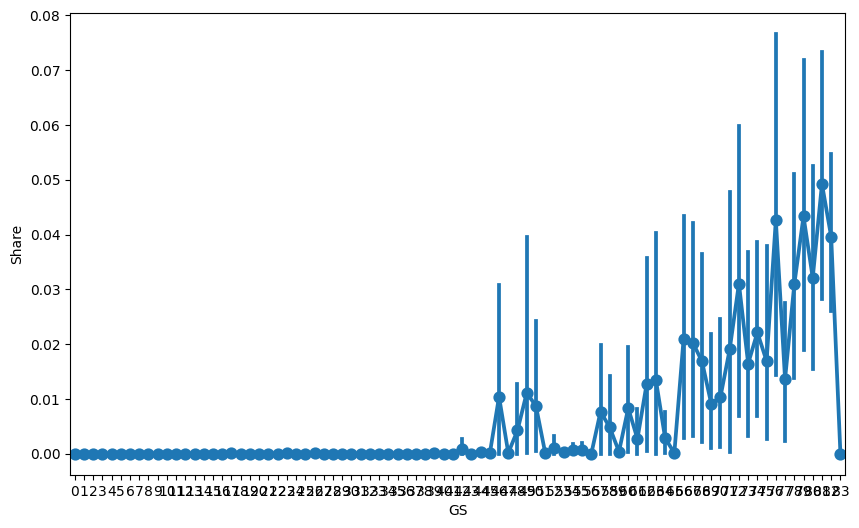

In [ ]:
plt.figure(figsize = (10,6))
sns.pointplot(data=AllStats, x='GS',y='Share')

מכאן ניתן ללמוד שלכמות המשחקים שבו שחקן פתח יש השפעה על האם יזכה בתואר

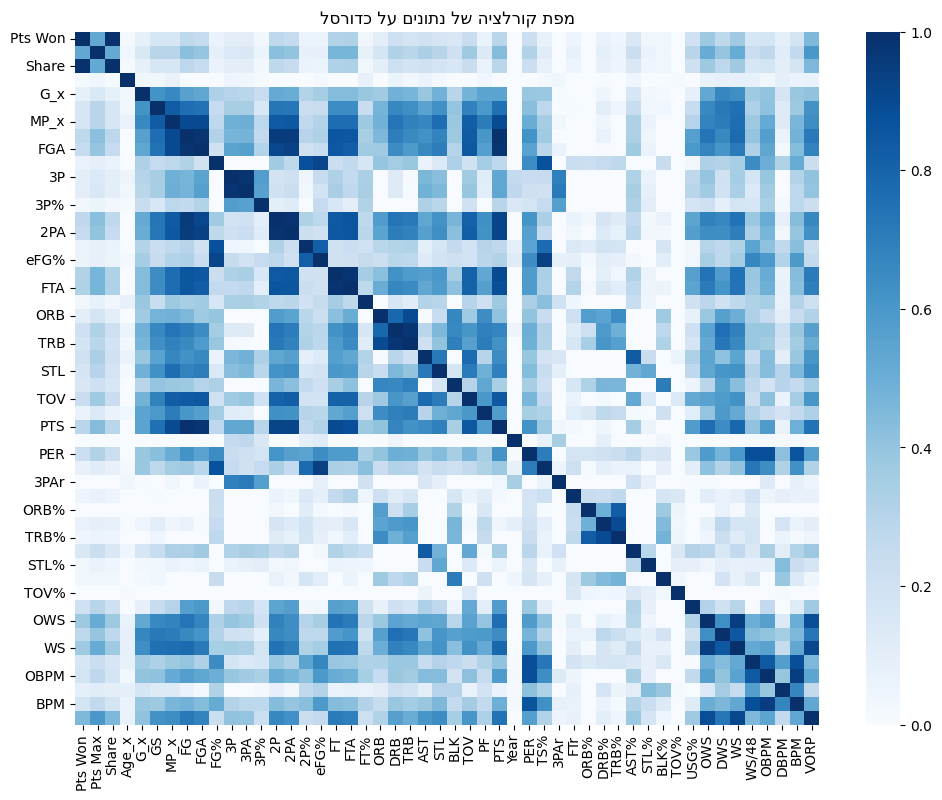

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = AllStats[['Pts Won', 'Pts Max', 'Share', 'Age_x', 'G_x', 'GS', 'MP_x', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Year', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP']].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix, annot=False, cmap=plt.cm.Blues, fmt=".2f", vmin=0, vmax=1)
plt.title('לסרודכ לע םינותנ לש היצלרוק תפמ')
plt.show()

מגרף זה אנו לומדים אילו מאפיינים משפיעים אחד על השני. ניתן לראות שהמאפיין המשפיע ביותר על כמות ההצבעות לזכייה בתואר הוא המאפיין VORP.

##אלגוריתמים

ספריות חשובות בשביל האלגוריתמים

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
import plotly.express as px
import sklearn.metrics as metrics
import pandas as pd

### בניית תבניות עבור האלגוריתמים הבאים

### תבנית עבור האלגוריתמים

In [ ]:
features = ['FG', 'FGA',
       'FG%', '2P', '2PA', 'FT', 'FTA'
        ,'TOV', 'PTS', 'PER', 'AST%', 'USG%'
       ,'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
        'BPM', 'VORP']
train,test = train_test_split(AllStats[ AllStats['Year'] <2020], test_size = 0.25, random_state = 10)

In [ ]:
xtrain = train[features]
ytrain = train[['Share']]

xtest = test[features]
ytest = test[['Share']]

xtrain = xtrain.apply(pd.to_numeric)
ytrain = ytrain.apply(pd.to_numeric)

In [ ]:
def score(model):

    model.fit(xtrain, ytrain.values.ravel())
    y_pred = model.predict(xtest)

    print("R2 value is: " +  str(r2_score(ytest, y_pred)))

    cvs = cross_val_score(model, xtest, ytest.values.ravel(), cv = 4, scoring = 'r2')
    print("Cross Validation Score is: " + str(cvs.mean()))

### אלגוריתם 1 - Support Vector Regression

נחזה בעזרת המודל את הזוכה בשנת 2020 ונשווה לזוכה הידוע לנו בשנת 2020

In [ ]:
train = AllStats[ AllStats['Year'] <2020]
test = AllStats[ AllStats["Year"] == 2020]

In [ ]:
svr1 = SVR(kernel='rbf', gamma=1e-4, C=100, epsilon = .1)

score(svr1)

R2 value is: 0.2641818845531628
Cross Validation Score is: -0.09924597472530122


In [ ]:
predictions_svr = svr1.predict(test[features])
predictions_svr = pd.DataFrame(predictions_svr, columns=["predictions"], index=test.index)

In [ ]:
combination_svr = pd.concat([test[["Player"]],predictions_svr], axis=1)

In [ ]:
sorted_svr = combination_svr.sort_values("predictions", ascending=False).head(10)

In [ ]:
sorted_svr

,Player,predictions
4852,Giannis Antetokounmpo,0.554344
5761,James Harden,0.494160
8352,Luka Dončić,0.281165
8112,LeBron James,0.263541
5679,Jamal Crawford,0.256531
2752,Damian Lillard,0.162334
704,Anthony Davis,0.150917
7231,Kawhi Leonard,0.132831
2992,Darius Garland,0.101432
8841,Marques Bolden,0.076628


<Axes: xlabel='Player'>

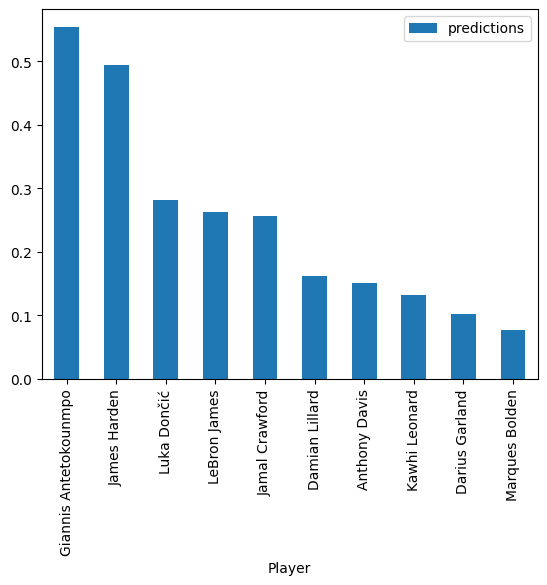

In [ ]:
import matplotlib.pyplot as plt
sorted_svr.plot(x='Player', y='predictions', kind='bar')

המודל חזה שיאניס אנטטקומפו יזכה בתואר
יאניס אכן זכה ולכן המודל הצליח, לברון ג'יימס שהגיע במקום השני נחזה שיגיע רביעי.

המודל חזה נכון את הטופ 4 אך לא הצליח לחזות מעבר

### אלגוריתם 2 - Random Forest regression

נמצא את ההיפר פרמטרים:

In [ ]:
parameters = {
    'n_estimators':[100, 200, 400, 600],
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
             }

gs_clf = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=-1,verbose=10)
gs_clf = gs_clf.fit(xtrain, ytrain)
print(gs_clf.best_score_)
print(gs_clf.best_params_)

Fitting 5 folds for each of 1584 candidates, totalling 7920 fits


In [ ]:
rf2 = RandomForestRegressor(bootstrap = True, max_depth = 10, max_features = 'sqrt',min_samples_leaf = 2,
                           min_samples_split = 2, random_state = 8, n_estimators = 200, criterion = 'friedman_mse')
score(rf2)

R2 value is: 0.7657815910231386
Cross Validation Score is: 0.8070866319403445


In [ ]:
predictions_rf2 = rf2.predict(AllStats[ AllStats["Year"] == 2020][features])
predictions_rf2 = pd.DataFrame(predictions_rf2, columns=["predictions"], index=AllStats[ AllStats["Year"] == 2020].index)


In [ ]:
combination_rf2 = pd.concat([AllStats[ AllStats["Year"] == 2020][["Player","Share"]],predictions_rf2], axis=1)

In [ ]:
combination_rf2.sort_values("predictions", ascending=False).head(10)

,Player,Share,predictions
4852,Giannis Antetokounmpo,0.952,0.557799
5761,James Harden,0.363,0.429092
8112,LeBron James,0.746,0.261072
2752,Damian Lillard,0.023,0.225194
8352,Luka Dončić,0.198,0.197925
704,Anthony Davis,0.081,0.191947
7231,Kawhi Leonard,0.166,0.141651
1387,Bradley Beal,0.000,0.110594
7877,Kyrie Irving,0.000,0.109463
11150,Russell Westbrook,0.000,0.100382


האלגוריתם חזה נכון את הזוכה במקום הראשון אך לא אחריו. הראה תוצאות דומות מאוד מהאלגוריתם הקודם

### אלגוריתם 3 - decision tree regression

נמצא את ההיפר פרמטרים:

In [ ]:
parameters = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
             }

gs_clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=-1,verbose=10)
gs_clf = gs_clf.fit(xtrain, ytrain)
print(gs_clf.best_score_)
print(gs_clf.best_params_)

In [ ]:
dtr = DecisionTreeRegressor(random_state = 31,max_depth= 80,max_features= 'sqrt',min_samples_leaf=4 )
score(dtr)

R2 value is: 0.5829029937139316
Cross Validation Score is: 0.7373700842317588


In [ ]:
predictions_dtr = dtr.predict(AllStats[ AllStats["Year"] == 2020][features])
predictions_dtr = pd.DataFrame(predictions_dtr, columns=["predictions"], index=AllStats[ AllStats["Year"] == 2020].index)


In [ ]:
combination_dtr = pd.concat([AllStats[ AllStats["Year"] == 2020][["Player","Share"]],predictions_dtr], axis=1)
combination_dtr.sort_values("predictions", ascending=False).head(15)

,Player,Share,predictions
4852,Giannis Antetokounmpo,0.952,0.744250
5761,James Harden,0.363,0.744250
7877,Kyrie Irving,0.000,0.535400
1387,Bradley Beal,0.000,0.388000
12680,Trae Young,0.000,0.388000
11150,Russell Westbrook,0.000,0.335333
704,Anthony Davis,0.081,0.294600
8112,LeBron James,0.746,0.294600
6465,Jimmy Butler,0.009,0.204250
2752,Damian Lillard,0.023,0.174250


האלגוריתם הראה תוצאות שונות לגמרי מהאלגוריתם הקודם שלא קרובות לתוצאות האמיתיות. האלגוריתם ביצע רע מאוד ולא היה קרוב לחזות נכון את התוצאות

### אלגוריתם 4 - Linear regression

In [ ]:
lr = LinearRegression()
score(lr)

R2 value is: 0.2274055600063547
Cross Validation Score is: 0.20869034830980202


In [ ]:
predictions_lr = lr.predict(AllStats[ AllStats["Year"] == 2020][features])
predictions_lr = pd.DataFrame(predictions_lr, columns=["predictions"], index=AllStats[ AllStats["Year"] == 2020].index)

In [ ]:
combination_lr = pd.concat([AllStats[ AllStats["Year"] == 2020][["Player","Share"]],predictions_lr], axis=1)
combination_lr.sort_values("predictions", ascending=False).head(15)

,Player,Share,predictions
4852,Giannis Antetokounmpo,0.952,0.199595
5761,James Harden,0.363,0.148958
8112,LeBron James,0.746,0.142321
8352,Luka Dončić,0.198,0.130910
704,Anthony Davis,0.081,0.122077
9794,Nikola Jokić,0.018,0.119335
7231,Kawhi Leonard,0.166,0.107418
2752,Damian Lillard,0.023,0.106710
6465,Jimmy Butler,0.009,0.083161
11129,Rudy Gobert,0.000,0.079927


האלגוריתם גם הראה תוצאות דומות לשניים הראשונים גם צדק במקום הראשון אך פחות בשאר.

### אלגוריתם 5 - K nearest neighbours

In [ ]:
parameters =  {'weights': ['uniform', 'distance'],
               'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
              }



gs_clf = GridSearchCV(neighbors.KNeighborsRegressor(), parameters, n_jobs=-1,verbose=10)
gs_clf = gs_clf.fit(xtrain, ytrain)
print(gs_clf.best_score_)
print(gs_clf.best_params_)

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 19, weights = 'distance')
score(knn)

R2 value is: 0.6714249841048132
Cross Validation Score is: 0.4846710686986873


In [ ]:
predictions_knn = knn.predict(AllStats[ AllStats["Year"] == 2020][features])
predictions_knn = pd.DataFrame(predictions_knn, columns=["predictions"], index=AllStats[ AllStats["Year"] == 2020].index)

In [ ]:
combination_knn = pd.concat([AllStats[ AllStats["Year"] == 2020][["Player","Share"]],predictions_knn], axis=1)
combination_knn.sort_values("predictions", ascending=False).head(15)

,Player,Share,predictions
5761,James Harden,0.363,0.332740
8112,LeBron James,0.746,0.198690
9794,Nikola Jokić,0.018,0.166438
8352,Luka Dončić,0.198,0.164986
4852,Giannis Antetokounmpo,0.952,0.161014
12680,Trae Young,0.000,0.118314
2752,Damian Lillard,0.023,0.108224
704,Anthony Davis,0.081,0.093873
7231,Kawhi Leonard,0.166,0.061911
6134,Jayson Tatum,0.001,0.036242


## בדיקה עבור השנה - מי יזכה בתואר ב2024



### ניקוי הנתונים

In [ ]:
current_players = pd.read_csv("/content/drive/MyDrive/Machine Learning/players/All Players Data/PlayerData2024.csv")
current_advanced = pd.read_csv("/content/drive/MyDrive/Machine Learning/players/All Players Data/AdvancedplayerData2024.csv")

In [ ]:
current_players.drop('Unnamed: 0',axis = 1, inplace = True)
current_advanced.drop('Unnamed: 0',axis = 1, inplace = True)
current_advanced.drop('Unnamed: 19',axis = 1, inplace = True)
current_advanced.drop('Unnamed: 24',axis = 1, inplace = True)

In [ ]:
print(current_players.shape)
print(current_advanced.shape)

(717, 31)
(717, 28)


In [ ]:
for i in range(1,744):
  if current_players.iloc[i, current_players.columns.get_loc('Age')] == 'Age':
    current_players.drop(current_players.index[i],inplace = True)
print(current_players.shape)

In [ ]:
for i in range(1,744):
  if current_advanced.iloc[i, current_advanced.columns.get_loc('Age')] == 'Age':
    current_advanced.drop(current_advanced.index[i],inplace = True)
print(current_advanced.shape)

In [ ]:
CurrentStats=current_players.merge(current_advanced, how="outer",on=["Player", "Tm","Year"])

In [ ]:
CurrentStats.drop('Pos_y',axis=1,inplace=True)
CurrentStats.drop('Age_y',axis=1,inplace=True)
CurrentStats.drop('G_y',axis=1,inplace=True)
CurrentStats.drop('MP_y',axis=1,inplace=True)
CurrentStats.drop('Rk_x',axis=1,inplace=True)
CurrentStats.drop('Rk_y',axis=1,inplace=True)
CurrentStats.columns

Index(['Player', 'Pos_x', 'Age_x', 'Tm', 'G_x', 'GS', 'MP_x', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Year', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [ ]:
def single_row(df):
  if df.shape[0]==1:
    return df
  else:
    row = df[df["Tm"] == "TOT"]
    row["Tm"] = df.iloc[-1,:]["Tm"]
    return row
CurrentStats = CurrentStats.groupby(["Player","Year"]).apply(single_row)

In [ ]:
CurrentStats.index = CurrentStats.index.droplevel()

In [ ]:
from google.colab import files
CurrentStats.to_csv("CleanedCurrentStats.csv")
files.download("CleanedCurrentStats.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### אלגוריתמים

#### תבנית עבור האלגוריתמים

In [ ]:
features = ['G_x','MP_x','FG', 'FGA',
       'FG%', '2P', '2PA', 'FT', 'FTA'
        ,'TOV', 'PTS', 'PER', 'AST%', 'USG%'
       ,'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
        'BPM', 'VORP']
train1,test1 = train_test_split(AllStats, test_size = 0.25, random_state = 10)

In [ ]:
xtrain1 = train1[features]
ytrain1 = train1[['Share']]

xtest1 = test1[features]
ytest1 = test1[['Share']]

xtrain1 = xtrain1.apply(pd.to_numeric)
ytrain1 = ytrain1.apply(pd.to_numeric)

In [ ]:
def score(model):

    model.fit(xtrain1, ytrain1.values.ravel())
    y_pred1 = model.predict(xtest1)

    print("R2 value is: " +  str(r2_score(ytest1, y_pred1)))

    cvs = cross_val_score(model, xtest1, ytest1.values.ravel(), cv = 4, scoring = 'r2')
    print("Cross Validation Score is: " + str(cvs.mean()))

In [ ]:
current_df=pd.read_csv("/content/drive/MyDrive/Machine Learning/players/All Players Data/CleanedCurrentStats.csv")

נמחק את כל השחקנים ששיחקו  פחות מ55 משחקים.

In [ ]:
current_df=current_df.fillna(0)
for i in range(1,221):
  if current_df.iloc[i, current_df.columns.get_loc('G_x')] <55 :
    current_df.drop(current_df.index[i],inplace = True)
print(current_df.shape)

(221, 51)


#### אלגוריתם 1 - Support Vector Regression

In [ ]:
svr = SVR(kernel='rbf', gamma=1e-4, C=100, epsilon = .1)

score(svr)

R2 value is: 0.26199070894423737
Cross Validation Score is: -0.0192469244230854


In [ ]:
predictions_svr1 = svr.predict(current_df[features])
predictions_svr1 = pd.DataFrame(predictions_svr1, columns=["predictions"], index=current_df.index)

In [ ]:
combination_svr1 = pd.concat([current_df[["Player"]],predictions_svr1], axis=1)

In [ ]:
sorted_svr1 = combination_svr1.sort_values("predictions", ascending=False).head(10)

In [ ]:
sorted_svr1

,Player,predictions
430,Nikola Jokić,0.537361
183,Giannis Antetokounmpo,0.398225
496,Shai Gilgeous-Alexander,0.381752
370,Luka Dončić,0.370961
230,Jalen Brunson,0.103905
148,Domantas Sabonis,0.091981
265,Jayson Tatum,0.080919
543,Tyrese Haliburton,0.044903
490,Scoot Henderson,0.039357
342,Keyonte George,0.033648


<Axes: xlabel='Player'>

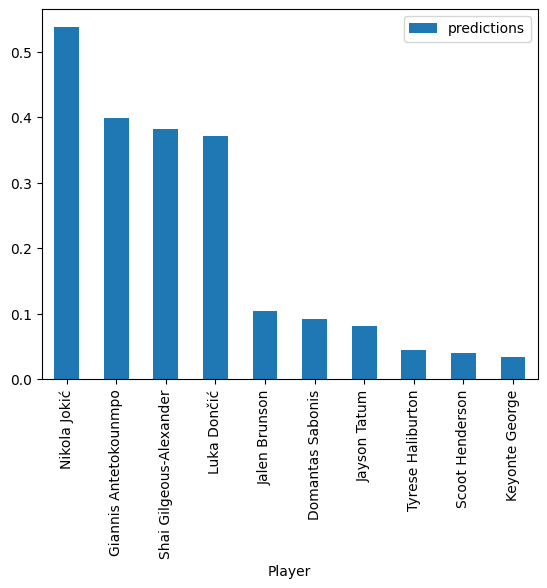

In [ ]:
import matplotlib.pyplot as plt
sorted_svr1.plot(x='Player', y='predictions', kind='bar')

#### אלגוריתם 2 - Random Forest regression

In [ ]:
rf1 = RandomForestRegressor(bootstrap = True, max_depth = 10, max_features = 'sqrt',min_samples_leaf = 2,
                           min_samples_split = 2, random_state = 8, n_estimators = 200, criterion = 'friedman_mse')
score(rf1)

R2 value is: 0.718670260196103
Cross Validation Score is: 0.6620777693314812


In [ ]:
predictions_rf1 = rf1.predict(current_df[features])
predictions_rf1 = pd.DataFrame(predictions_rf1, columns=["predictions"], index=current_df.index)

In [ ]:
combination_rf1 = pd.concat([current_df[["Player"]],predictions_rf1], axis=1)

In [ ]:
sorted_rf1 = combination_rf1.sort_values("predictions", ascending=False).head(10)

In [ ]:
combination_rf1.sort_values("predictions", ascending=False).head(10)

,Player,predictions
430,Nikola Jokić,0.698792
496,Shai Gilgeous-Alexander,0.607178
183,Giannis Antetokounmpo,0.477781
370,Luka Dončić,0.436718
28,Anthony Davis,0.132157
230,Jalen Brunson,0.108454
265,Jayson Tatum,0.095891
148,Domantas Sabonis,0.061166
335,Kevin Durant,0.053079
362,LeBron James,0.052170


<Axes: xlabel='Player'>

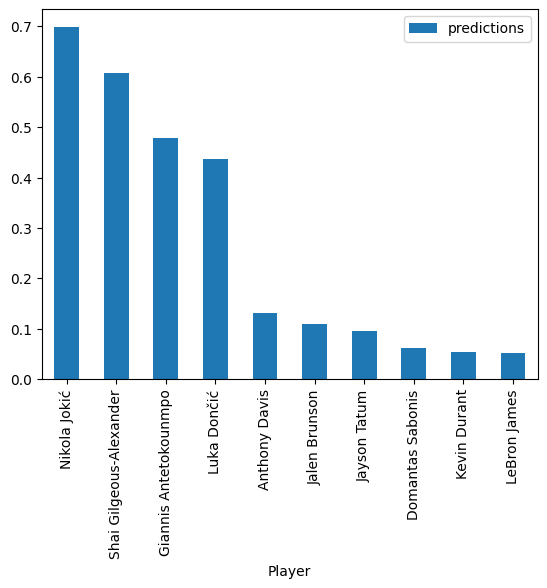

In [ ]:
import matplotlib.pyplot as plt
sorted_rf1.plot(x='Player', y='predictions', kind='bar')

#### אלגוריתם 3 - decision tree regression

In [ ]:
dtr1 = DecisionTreeRegressor(random_state = 31,max_depth= 80,max_features= 'sqrt',min_samples_leaf=4 )
score(dtr1)

R2 value is: 0.5104369154972536
Cross Validation Score is: 0.2954259504873135


In [ ]:
predictions_dtr1 = dtr1.predict(current_df[features])
predictions_dtr1 = pd.DataFrame(predictions_dtr1, columns=["predictions"], index=current_df.index)

In [ ]:
combination_dtr1 = pd.concat([current_df[["Player"]],predictions_dtr1], axis=1)
sorted_dtr=combination_dtr1.sort_values("predictions", ascending=False).head(10)
sorted_dtr

,Player,predictions
183,Giannis Antetokounmpo,0.689000
430,Nikola Jokić,0.370400
230,Jalen Brunson,0.349000
496,Shai Gilgeous-Alexander,0.243000
370,Luka Dončić,0.243000
564,Zion Williamson,0.234000
148,Domantas Sabonis,0.108250
265,Jayson Tatum,0.049167
362,LeBron James,0.049167
28,Anthony Davis,0.049167


<Axes: xlabel='Player'>

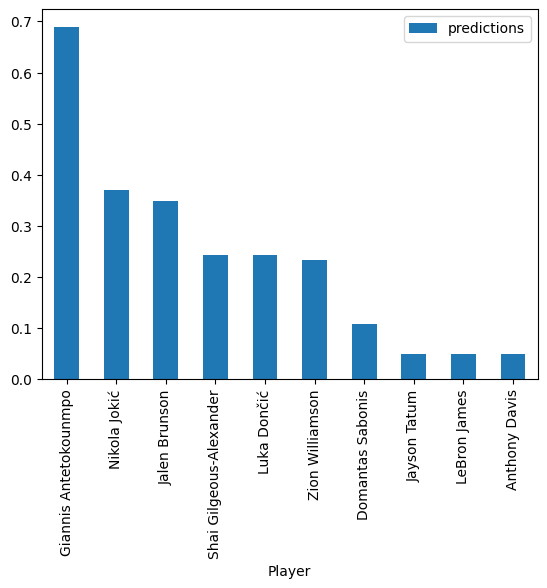

In [ ]:
import matplotlib.pyplot as plt
sorted_dtr.plot(x='Player', y='predictions', kind='bar')

#### אלגוריתם 4 - linear regression

In [ ]:
lr1 = LinearRegression()
score(lr1)

R2 value is: 0.22685698413112254
Cross Validation Score is: 0.20016061430815188


In [ ]:
predictions_lr1 = lr1.predict(current_df[features])
predictions_lr1 = pd.DataFrame(predictions_lr1, columns=["predictions"], index=current_df.index)

In [ ]:
combination_lr1 = pd.concat([current_df[["Player"]],predictions_lr1], axis=1)
sorted_lr=combination_lr1.sort_values("predictions", ascending=False).head(10)
sorted_lr

,Player,predictions
430,Nikola Jokić,0.218921
183,Giannis Antetokounmpo,0.206910
370,Luka Dončić,0.196042
496,Shai Gilgeous-Alexander,0.163384
148,Domantas Sabonis,0.121673
362,LeBron James,0.112568
230,Jalen Brunson,0.110663
265,Jayson Tatum,0.103279
17,Alperen Sengun,0.096773
28,Anthony Davis,0.095500


<Axes: xlabel='Player'>

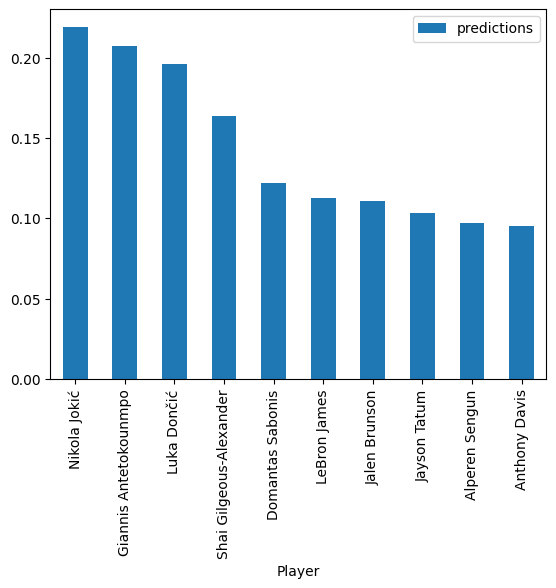

In [ ]:
import matplotlib.pyplot as plt
sorted_lr.plot(x='Player', y='predictions', kind='bar')

#### אלגוריתם 5 - K nearest neighbours

In [ ]:
knn1 = neighbors.KNeighborsRegressor(n_neighbors = 19, weights = 'distance')
score(knn1)

R2 value is: 0.5958746980288299
Cross Validation Score is: 0.5178287735670881


In [ ]:
predictions_knn1 = knn1.predict(current_df[features])
predictions_knn1 = pd.DataFrame(predictions_knn1, columns=["predictions"], index=current_df.index)

In [ ]:
combination_knn1 = pd.concat([current_df[["Player"]],predictions_knn1], axis=1)
sorted_knn=combination_knn1.sort_values("predictions", ascending=False).head(10)
sorted_knn

,Player,predictions
430,Nikola Jokić,0.603626
370,Luka Dončić,0.410007
183,Giannis Antetokounmpo,0.367363
496,Shai Gilgeous-Alexander,0.366525
28,Anthony Davis,0.124204
265,Jayson Tatum,0.093174
335,Kevin Durant,0.086023
230,Jalen Brunson,0.060191
543,Tyrese Haliburton,0.049139
362,LeBron James,0.031017


<Axes: xlabel='Player'>

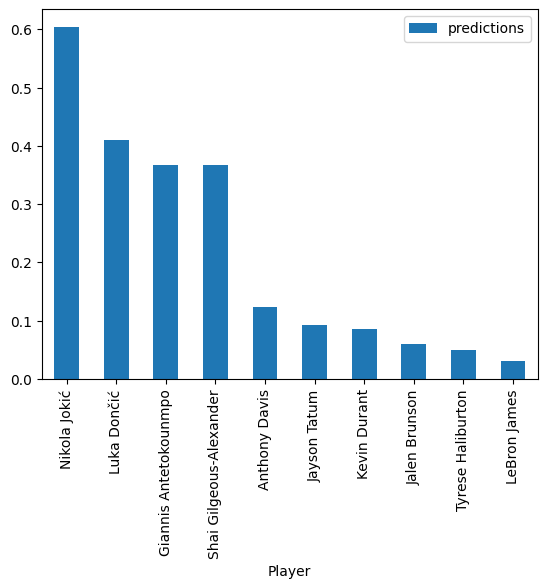

In [ ]:
import matplotlib.pyplot as plt
sorted_knn.plot(x='Player', y='predictions', kind='bar')

תחזית זו דומה מאוד לתחזית הרשמית שהליגה פרסמה. ונכון לעכשיו זה האלגוריתם שנראה שהוציא את התוצאות הכי טובות

### מסקנות:
מתוך 5 אלגוריתמים, 4 הצביעו על ניקולה יוקיץ' כהזוכה של התואר בשנת 2024. לדעתי האישית ,אם התלות הייתה רק בהופעות על המגרש המכונה הייתה צודקת ויוקיץ' אכן היה זוכה. אך לדעתי אפקט המשפיע גם הוא זה שיוקיץ' נבחר כבר שנתיים מתוך השלוש האחרונות ולמצביעים קשה להצביע הרבה פעמים לאותו בן אדם. ולכן לדעתי שחקן אחר יזכה ,לפי המכונה השחקן הזה כנראה יהיה לוקה דונצ'יץ' או שיי גילג'וס אלכסנדר.

